# MSEM 695 Design Project - Classify Song Genres From Audio Data
## Jeelkumar Patel

In [1]:
# Read first dataset and get information about data
import pandas as pd
import numpy as np
tracks = pd.read_csv('OneDrive/Desktop/fma-rock-vs-hiphop.csv')
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [2]:
# Read second dataset and get information about data
echonest_metrics = pd.read_json('OneDrive/Desktop/archive/echonest-metrics.json', precise_float=True)
echonest_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [3]:
# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['track_id', 'genre_top']], on='track_id')

# Inspect the resultant dataframe
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [4]:
# Correlation matrix
corr = echonest_metrics.corr()
corr.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.279829,0.102056,0.121991,-0.283206,-0.004059,-0.075077,0.004313,0.020201
acousticness,-0.279829,1.000000,-0.189599,-0.477273,0.110033,0.041319,0.038785,-0.110701,-0.085436
danceability,0.102056,-0.189599,1.000000,0.045345,-0.118033,-0.143339,0.171311,-0.094352,0.428515
energy,0.121991,-0.477273,0.045345,1.000000,-0.002412,0.045752,-0.008645,0.227324,0.219384
instrumentalness,-0.283206,0.110033,-0.118033,-0.002412,1.000000,-0.058593,-0.216689,0.023003,-0.145200
liveness,-0.004059,0.041319,-0.143339,0.045752,-0.058593,1.000000,0.073104,-0.007566,-0.017886
speechiness,-0.075077,0.038785,0.171311,-0.008645,-0.216689,0.073104,1.000000,0.032188,0.094794
tempo,0.004313,-0.110701,-0.094352,0.227324,0.023003,-0.007566,0.032188,1.000000,0.129911
valence,0.020201,-0.085436,0.428515,0.219384,-0.145200,-0.017886,0.094794,0.129911,1.000000


In [5]:
# importing train test split function to split the data into features and lables
from sklearn.model_selection import train_test_split

# creating features by dropping "genre_top" and "track_id" columns/features from echo_tracks.
features = echo_tracks.drop(["genre_top", "track_id"], axis = 1).values

# creating lables. This is also our target variable as we are trying to predict genres(Hip-Hop, Rock) of the different songs.
lables = echo_tracks["genre_top"].values

# splitting the data
train_features, test_features, train_lables, test_lables = train_test_split(features, lables, random_state=10)

In [6]:
features.shape

(4802, 8)

In [7]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling train data
scaled_train_features = scaler.fit_transform(train_features)
#Scaling test data
scaled_test_features = scaler.transform(test_features)

In [8]:
# PCA Principal Component Analysis
# This command allows the Matplotlib plots to be displayed directly within the Jupyter Notebook.
# Matplotlib is a python library for data visualizations
%matplotlib inline 

# mports the Matplotlib library for creating plots
import matplotlib.pyplot as plt

# Imports the PCA class from scikit-learn, a popular machine learning library in Python.
from sklearn.decomposition import PCA

#Creates an instance of the PCA class. By default, it will retain all principal components.
#if I use pca = PCA(number_comoponents) where I give number_components = 5, PCA will reduce my features to top 5 features
# that are making highest impact on the target variable
pca = PCA()

# Fits the PCA model to the standardized training features (scaled_train_features). 
#This step computes the principal components and other related information.
pca_features = pca.fit(scaled_train_features)

# Retrieves the explained variance ratio of each principal component. 
# The explained variance ratio represents the proportion of the dataset's variance that lies along each principal component. 
# These values are sorted in descending order.
exp_variance = pca.explained_variance_ratio_
exp_variance



array([0.23895983, 0.18149129, 0.13648392, 0.13004899, 0.1124591 ,
       0.08329047, 0.07040829, 0.04685811])

Text(0.5, 0, 'Principal Component #')

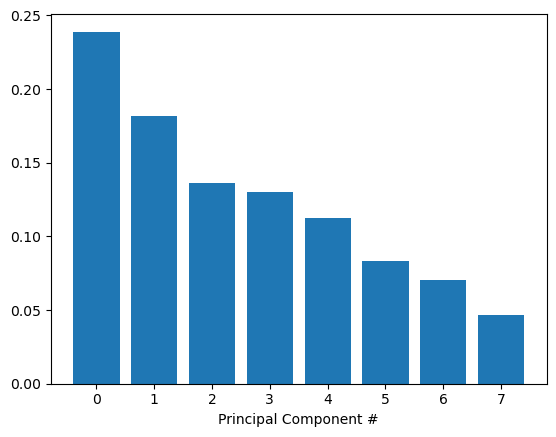

In [9]:
# plot the explained variance using a barplot
# Creates a new figure and axis for the plot.
fig, ax = plt.subplots()

#Plots a bar chart where the x-axis corresponds to the principal components, & y-axis represents the explained variance ratio.
ax.bar(range(pca.n_components_), exp_variance)

# Sets the label for the x-axis.
ax.set_xlabel('Principal Component #')

In [10]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=6, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.23895983, 0.18149129, 0.13648392, 0.13004899, 0.1124591 ,
       0.08329047])

Text(0.5, 0, 'Principal Component #')

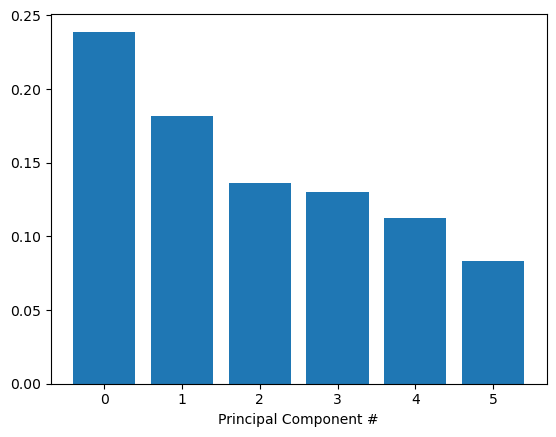

In [11]:
# plot the explained variance using a barplot
# Creates a new figure and axis for the plot.
fig, ax = plt.subplots()

#Plots a bar chart where the x-axis corresponds to the principal components, & y-axis represents the explained variance ratio.
ax.bar(range(pca.n_components_), exp_variance)

# Sets the label for the x-axis.
ax.set_xlabel('Principal Component #')

In [12]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create our decision tree
tree = DecisionTreeClassifier(random_state=10)

# Train our decision tree
tree.fit(train_pca, train_lables)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logisitic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_lables)
pred_labels_logit = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_lables, pred_labels_tree)
class_rep_log = classification_report(test_lables, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [14]:
# Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [15]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca, train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
tree_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                      ("tree", DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=6)), 
                        ("logreg", LogisticRegression(random_state=10))])

# Set up our K-fold cross-validation
kf = KFold(10)

# Train our models using KFold cv
tree_score = cross_val_score(tree_pipe, features, labels, cv=kf)
logit_score = cross_val_score(logreg_pipe, features, labels, cv=kf)

# Print the mean of each array o scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7582417582417582 Logistic Regression: 0.782967032967033
